<a href="https://colab.research.google.com/github/Shaas08/hello-world/blob/master/Animal_relu_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
#upload the Kaggle API credentials JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saswatbanerjee","key":"29690d75b181da5819bd8a7697ee4f72"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d andrewmvd/animal-faces

100% 693M/696M [00:08<00:00, 101MB/s]
100% 696M/696M [00:08<00:00, 81.4MB/s]


In [5]:
!unzip animal-faces.zip -d animal-faces

Streaming output truncated to the last 5000 lines.
  inflating: animal-faces/afhq/train/wild/flickr_wild_001378.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001379.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001380.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001381.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001382.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001384.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001385.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001386.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001387.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001388.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001389.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001390.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001391.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001392.jpg  
  inflating

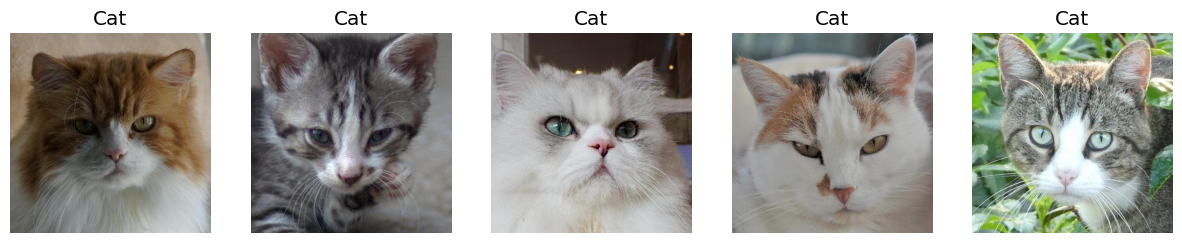

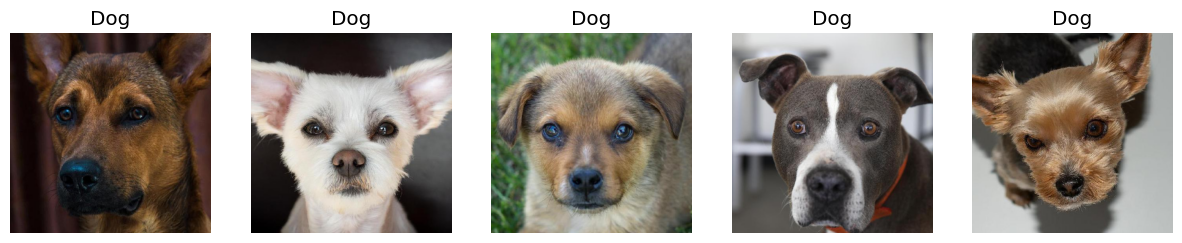

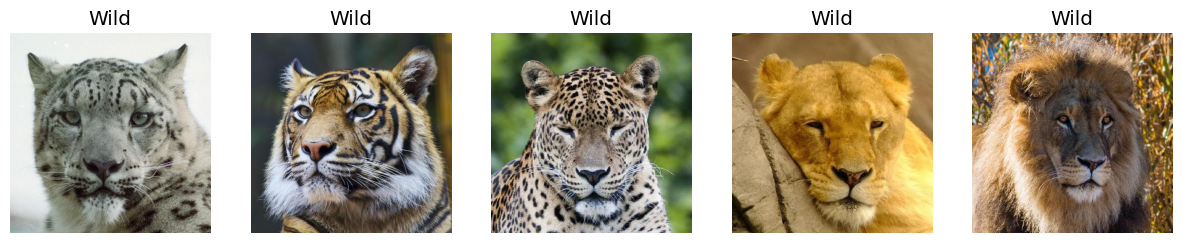

In [6]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import matplotlib.pylab as plt
plt.style.use('ggplot')
# Define paths to the new dataset
cat_files = glob('animal-faces/afhq/train/cat/*.jpg')
dog_files = glob('animal-faces/afhq/train/dog/*.jpg')
wild_files = glob('animal-faces/afhq/train/wild/*.jpg')

# Display some sample images
num_samples = 5

# Display sample cat images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    img = cv2.imread(cat_files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title('Cat')
    plt.axis('off')
plt.show()

# Display sample dog images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    img = cv2.imread(dog_files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title('Dog')
    plt.axis('off')
plt.show()
# Display sample wild animal images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    img = cv2.imread(wild_files[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title('Wild')
    plt.axis('off')
plt.show()

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                     

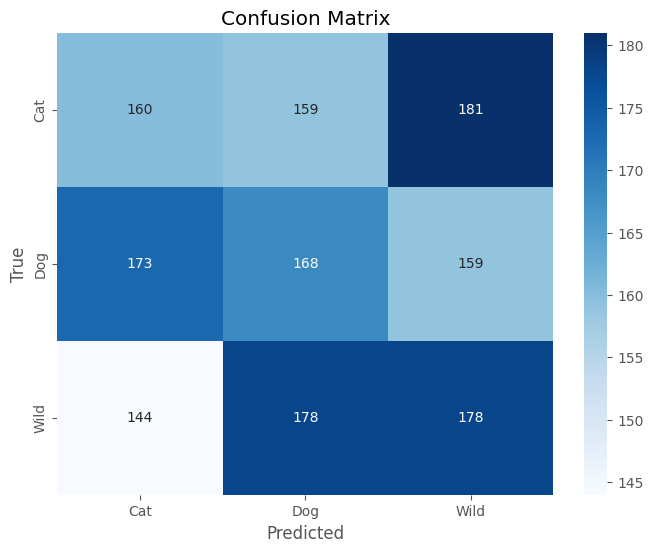

47/47 [==============================] - 24s 518ms/step


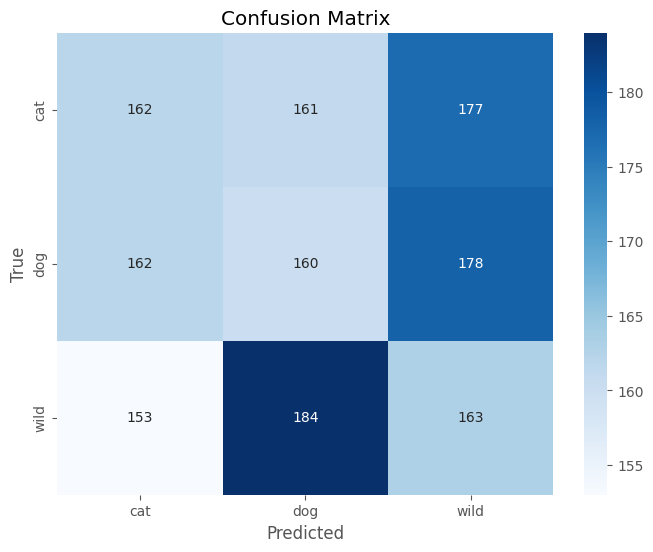

Classification Report:
              precision    recall  f1-score   support

         cat       0.34      0.32      0.33       500
         dog       0.32      0.32      0.32       500
        wild       0.31      0.33      0.32       500

    accuracy                           0.32      1500
   macro avg       0.32      0.32      0.32      1500
weighted avg       0.32      0.32      0.32      1500



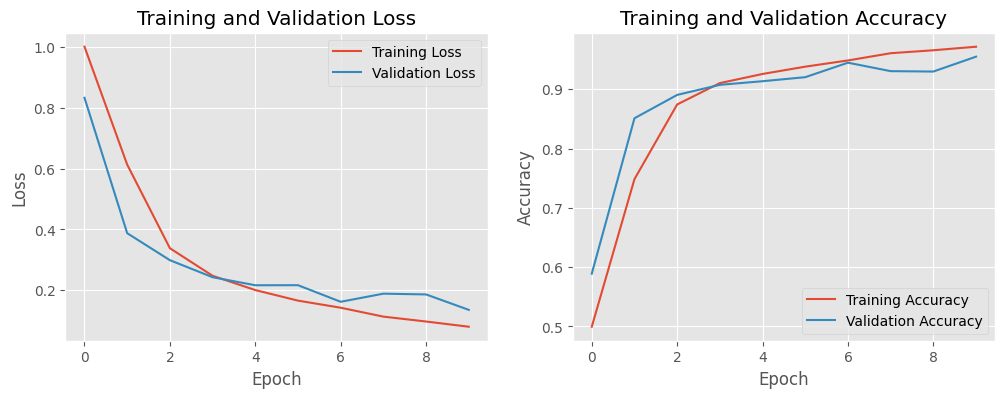

Results Discussion:
- The model achieved an accuracy of 0.9546666741371155 on the validation set.
- The classification report provides detailed metrics such as precision, recall, and F1-score for each class.
- The confusion matrix visualizes the model's performance, showing where it succeeds and where it struggles.
- Challenges encountered during model development may include overfitting, class imbalance, and tuning hyperparameters.


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
NUM_EPOCHS = 10

# Define paths to dataset
train_data_dir = 'animal-faces/afhq/train'
validation_data_dir = 'animal-faces/afhq/val'

# Preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # Update with the actual number of classes
])

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
evaluation = model.evaluate(validation_generator)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

# Get predictions
validation_generator.reset()
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = validation_generator.classes

# Calculate relevant evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Cat', 'Dog','Wild']

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions for the test dataset
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to binary format
y_true = validation_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_labels = [k for k, v in validation_generator.class_indices.items()]
print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Discuss the results and challenges
print("Results Discussion:")
print("- The model achieved an accuracy of", evaluation[1], "on the validation set.")
print("- The classification report provides detailed metrics such as precision, recall, and F1-score for each class.")
print("- The confusion matrix visualizes the model's performance, showing where it succeeds and where it struggles.")
print("- Challenges encountered during model development may include overfitting, class imbalance, and tuning hyperparameters.")

In [8]:
# Iterate over the validation generator and print the predicted image result
validation_generator.reset()
for i in range(len(validation_generator)):
    batch = validation_generator[i]
    images, true_labels = batch
    predicted_labels = model.predict(images)
    predicted_classes = np.argmax(predicted_labels, axis=1)

    for j in range(len(true_labels)):
        true_label = class_labels[np.argmax(true_labels[j])]
        predicted_label = class_labels[predicted_classes[j]]
        print("True Label:", true_label)
        print("Predicted Label:", predicted_label)
        print()


1/1 [==============================] - 3s 3s/step
True Label: dog
Predicted Label: dog

True Label: wild
Predicted Label: wild

True Label: dog
Predicted Label: dog

True Label: cat
Predicted Label: cat

True Label: dog
Predicted Label: dog

True Label: dog
Predicted Label: dog

True Label: dog
Predicted Label: dog

True Label: cat
Predicted Label: cat

True Label: wild
Predicted Label: wild

True Label: wild
Predicted Label: wild

True Label: wild
Predicted Label: wild

True Label: dog
Predicted Label: dog

True Label: cat
Predicted Label: cat

True Label: wild
Predicted Label: dog

True Label: dog
Predicted Label: dog

True Label: wild
Predicted Label: wild

True Label: dog
Predicted Label: dog

True Label: wild
Predicted Label: wild

True Label: dog
Predicted Label: dog

True Label: wild
Predicted Label: wild

True Label: dog
Predicted Label: dog

True Label: dog
Predicted Label: dog

True Label: wild
Predicted Label: wild

True Label: dog
Predicted Label: dog

True Label: cat
Predi

In [9]:
# Iterate over the validation generator and print the predicted image result
validation_generator.reset()
for i in range(len(validation_generator)):
    batch = validation_generator[i]
    images, true_labels = batch
    predicted_labels = model.predict(images)
    predicted_classes = np.argmax(predicted_labels, axis=1)

    true_label = class_labels[np.argmax(true_labels[0])]
    predicted_label = class_labels[predicted_classes[0]]

    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print()

    # Break out of the loop after printing one prediction per batch
    break


1/1 [==============================] - 1s 703ms/step
True Label: dog
Predicted Label: dog

